In [36]:
import os
import sys
data_folder = os.path.join(os.path.expanduser("~"), "Jupyter Books\\Data mining\\Chp9\\books")

In [37]:
print(data_folder)

C:\Users\spark\Jupyter Books\Data mining\Chp9\books


In [38]:
def clean_book(document):
    lines = document.split("\n")
    start= 0
    end = len(lines)
    for i in range(len(lines)):
        line = lines[i]
        if line.startswith("*** START OF THIS PROJECT GUTENBERG"):
            start = i + 1
        elif line.startswith("*** END OF THIS PROJECT GUTENBERG"):
            end = i - 1
    return "\n".join(lines[start:end])

In [39]:
import numpy as np

def load_books_data(folder=data_folder):
    documents = []
    authors = []
    subfolders = [subfolder for subfolder in os.listdir(folder)
                  if os.path.isdir(os.path.join(folder, subfolder))]
    for author_number, subfolder in enumerate(subfolders):
        full_subfolder_path = os.path.join(folder, subfolder)
        for document_name in os.listdir(full_subfolder_path):
            with open(os.path.join(full_subfolder_path, document_name)) as inf:
                documents.append(clean_book(inf.read()))
                authors.append(author_number)
    return documents, np.array(authors, dtype='int')

In [40]:
documents, classes = load_books_data(data_folder)

In [41]:
%matplotlib inline

In [42]:
document_lengths = [len(document) for document in documents]

In [43]:
import warnings
warnings.filterwarnings('ignore')

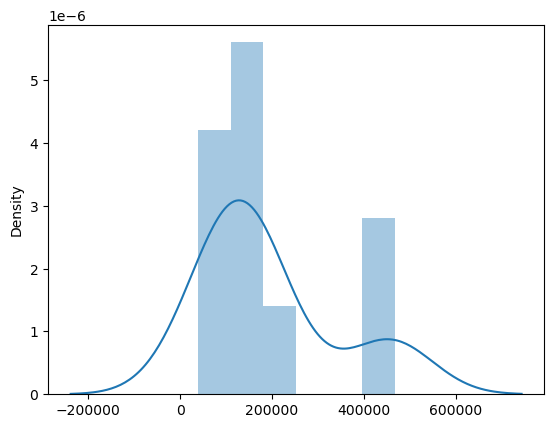

In [44]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.distplot(document_lengths)
plt.savefig("hist.png")

In [52]:
function_words = ["a", "able", "aboard", "about", "above", "absent",
                  "according" , "accordingly", "across", "after", "against",
                  "ahead", "albeit", "all", "along", "alongside", "although",
                  "am", "amid", "amidst", "among", "amongst", "amount", "an",
                    "and", "another", "anti", "any", "anybody", "anyone",
                    "anything", "are", "around", "as", "aside", "astraddle",
                    "astride", "at", "away", "bar", "barring", "be", "because",
                    "been", "before", "behind", "being", "below", "beneath",
                    "beside", "besides", "better", "between", "beyond", "bit",
                    "both", "but", "by", "can", "certain", "circa", "close",
                    "concerning", "consequently", "considering", "could",
                    "couple", "dare", "deal", "despite", "down", "due", "during",
                    "each", "eight", "eighth", "either", "enough", "every",
                    "everybody", "everyone", "everything", "except", "excepting",
                    "excluding", "failing", "few", "fewer", "fifth", "first",
                    "five", "following", "for", "four", "fourth", "from", "front",
                    "given", "good", "great", "had", "half", "have", "he",
                    "heaps", "hence", "her", "hers", "herself", "him", "himself",
                    "his", "however", "i", "if", "in", "including", "inside",
                    "instead", "into", "is", "it", "its", "itself", "keeping",
                    "lack", "less", "like", "little", "loads", "lots", "majority",
                    "many", "masses", "may", "me", "might", "mine", "minority",
                    "minus", "more", "most", "much", "must", "my", "myself",
                    "near", "need", "neither", "nevertheless", "next", "nine",
                    "ninth", "no", "nobody", "none", "nor", "nothing",
                    "notwithstanding", "number", "numbers", "of", "off", "on",
                    "once", "one", "onto", "opposite", "or", "other", "ought",
                    "our", "ours", "ourselves", "out", "outside", "over", "part",
                    "past", "pending", "per", "pertaining", "place", "plenty",
                    "plethora", "plus", "quantities", "quantity", "quarter",
                    "regarding", "remainder", "respecting", "rest", "round",
                    "save", "saving", "second", "seven", "seventh", "several",
                    "shall", "she", "should", "similar", "since", "six", "sixth",
                    "so", "some", "somebody", "someone", "something", "spite",
                    "such", "ten", "tenth", "than", "thanks", "that", "the",
                    "their", "theirs", "them", "themselves", "then", "thence",
                  "therefore", "these", "they", "third", "this", "those",
"though", "three", "through", "throughout", "thru", "thus",
"till", "time", "to", "tons", "top", "toward", "towards",
"two", "under", "underneath", "unless", "unlike", "until",
"unto", "up", "upon", "us", "used", "various", "versus",
"via", "view", "wanting", "was", "we", "were", "what",
"whatever", "when", "whenever", "where", "whereas",
"wherever", "whether", "which", "whichever", "while",
                  "whilst", "who", "whoever", "whole", "whom", "whomever",
"whose", "will", "with", "within", "without", "would", "yet",
"you", "your", "yours", "yourself", "yourselves"]

In [53]:
from sklearn.feature_extraction.text import CountVectorizer
extractor = CountVectorizer(vocabulary=function_words)

In [54]:
extractor.fit(documents)
counts = extractor.transform(documents)

In [55]:
normalized_counts = counts.T / np.array(document_lengths)

In [56]:
normalized_counts.shape

(293, 10)

In [57]:
averaged_counts = normalized_counts.mean(axis=1)
assert averaged_counts.shape[0] == normalized_counts.shape[0]

In [58]:
averaged_counts.shape

(293, 1)

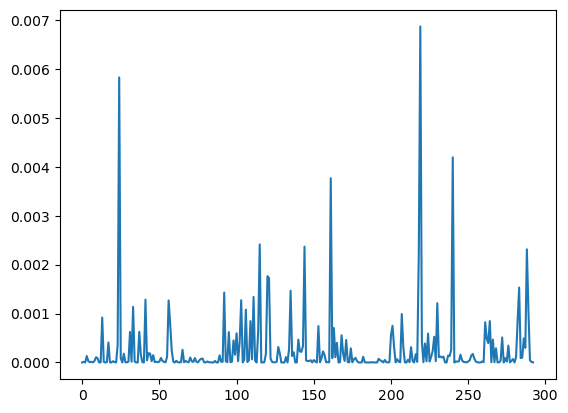

In [59]:
from matplotlib import pyplot as plt

plt.plot(averaged_counts)
plt.savefig('function.png')

In [60]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
# from sklearn import grid_search
from sklearn.model_selection import learning_curve, GridSearchCV

In [61]:
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svr = SVC()
grid = GridSearchCV(svr, parameters)

In [62]:
pipeline1 = Pipeline([('feature_extraction', extractor), ('clf', grid)])

In [63]:
scores = cross_val_score(pipeline1, documents, classes, scoring='f1_macro')

In [64]:
print(np.mean(scores))

0.6


In [65]:
pipeline = Pipeline([('feature_extraction', CountVectorizer(analyzer='char', ngram_range=(3, 3))),
                     ('classifier', grid)
                    ])
scores = cross_val_score(pipeline, documents, classes, scoring='f1_macro')
print("Score: {:.3f}".format(np.mean(scores)))

Score: 0.600


In [83]:
enron_data_folder = os.path.join(os.path.expanduser("~"), "Jupyter Books\\Data mining\\Chp9\\maildir")

In [84]:
enron_data_folder

'C:\\Users\\spark\\Jupyter Books\\Data mining\\Chp9\\maildir'

In [85]:
from email.parser import Parser
p = Parser()

In [86]:
from sklearn.utils import check_random_state

In [87]:
def get_enron_corpus(num_authors=10, data_folder=enron_data_folder,
                     min_docs_author=10, max_docs_author=100,
                     random_state=None):
    random_state = check_random_state(random_state)
    email_addresses = sorted(os.listdir(data_folder))
    random_state.shuffle(email_addresses)
    documents = []
    classes = []
    author_num = 0
    authors = {}
    for user in email_addresses:
        users_email_folder = os.path.join(data_folder, user)
        mail_folders = [os.path.join(users_email_folder, subfolder)
                        for subfolder in os.listdir(users_email_folder)
                        if "sent" in subfolder]
        try:
            authored_emails = [open(os.path.join(mail_folder, email_filename
                                                ), encoding='cp1252').read()
                               for mail_folder in mail_folders
                               for email_filename in os.listdir(mail_folder)]
        except IsADirectoryError:
            continue
        if len(authored_emails) < min_docs_author:
            continue
        if len(authored_emails) > max_docs_author:
            authored_emails = authored_emails[:max_docs_author]
        contents = [p.parsestr(email)._payload for email in authored_emails]
        documents.extend(contents)
        classes.extend([author_num] * len(authored_emails))
        authors[user] = author_num
        author_num += 1
        if author_num >= num_authors or author_num >= len(email_addresses):
            break
    return documents, np.array(classes), authors

In [88]:
documents, classes, authors = get_enron_corpus(data_folder=enron_data_folder, random_state=14)

In [89]:
sns.distplot?

Signature:
sns.distplot(
    a=None,
    bins=None,
    hist=True,
    kde=True,
    rug=False,
    fit=None,
    hist_kws=None,
    kde_kws=None,
    rug_kws=None,
    fit_kws=None,
    color=None,
    vertical=False,
    norm_hist=False,
    axlabel=None,
    label=None,
    ax=None,
    x=None,
)
Docstring:
DEPRECATED: Flexibly plot a univariate distribution of observations.

.. warning::
   This function is deprecated and will be removed in a future version.
   Please adapt your code to use one of two new functions:

   - :func:`displot`, a figure-level function with a similar flexibility
     over the kind of plot to draw
   - :func:`histplot`, an axes-level function for plotting histograms,
     including with kernel density smoothing

This function combines the matplotlib ``hist`` function (with automatic
calculation of a good default bin size) with the seaborn :func:`kdeplot`
and :func:`rugplot` functions. It can also fit ``scipy.stats``
distributions and plot the estimated PDF

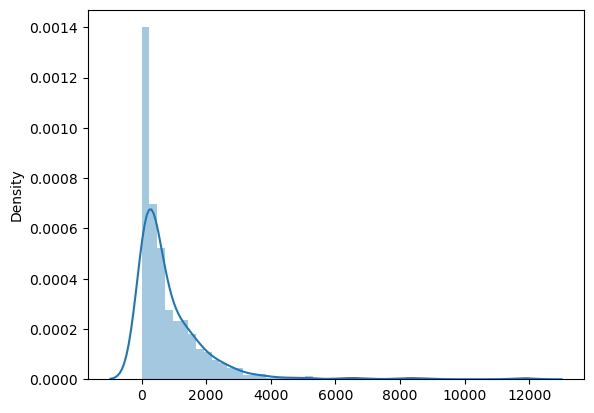

In [90]:
document_lengths = [len(document) for document in documents]
sns.distplot(document_lengths)
plt.savefig("enron_dist.png")

In [91]:
len(documents), len(classes)

(953, 953)

In [92]:
documents[100]

'Please review MEH presentation and send comments to MEH by 5:00 p.m.  May 12, \n1999 via notes mail.\n\nThank you,\n\nSylvia T. Sauseda/MEH'

In [93]:
scores = cross_val_score(pipeline, documents, classes, scoring='f1_macro')
print("Score: {:.3f}".format(np.mean(scores)))

Score: 0.574


In [77]:
from sklearn.model_selection import train_test_split
training_documents, testing_documents, y_train, y_test = train_test_split(documents, classes, random_state=14)

In [78]:
pipeline.fit(training_documents, y_train)
y_pred = pipeline.predict(testing_documents)

In [79]:
print(pipeline.named_steps['classifier'].best_params_)

{'C': 1, 'kernel': 'linear'}


In [80]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred, y_test)
cm = cm / cm.astype(np.float).sum(axis=1)
sorted_authors = sorted(authors.keys(), key=lambda x:authors[x])

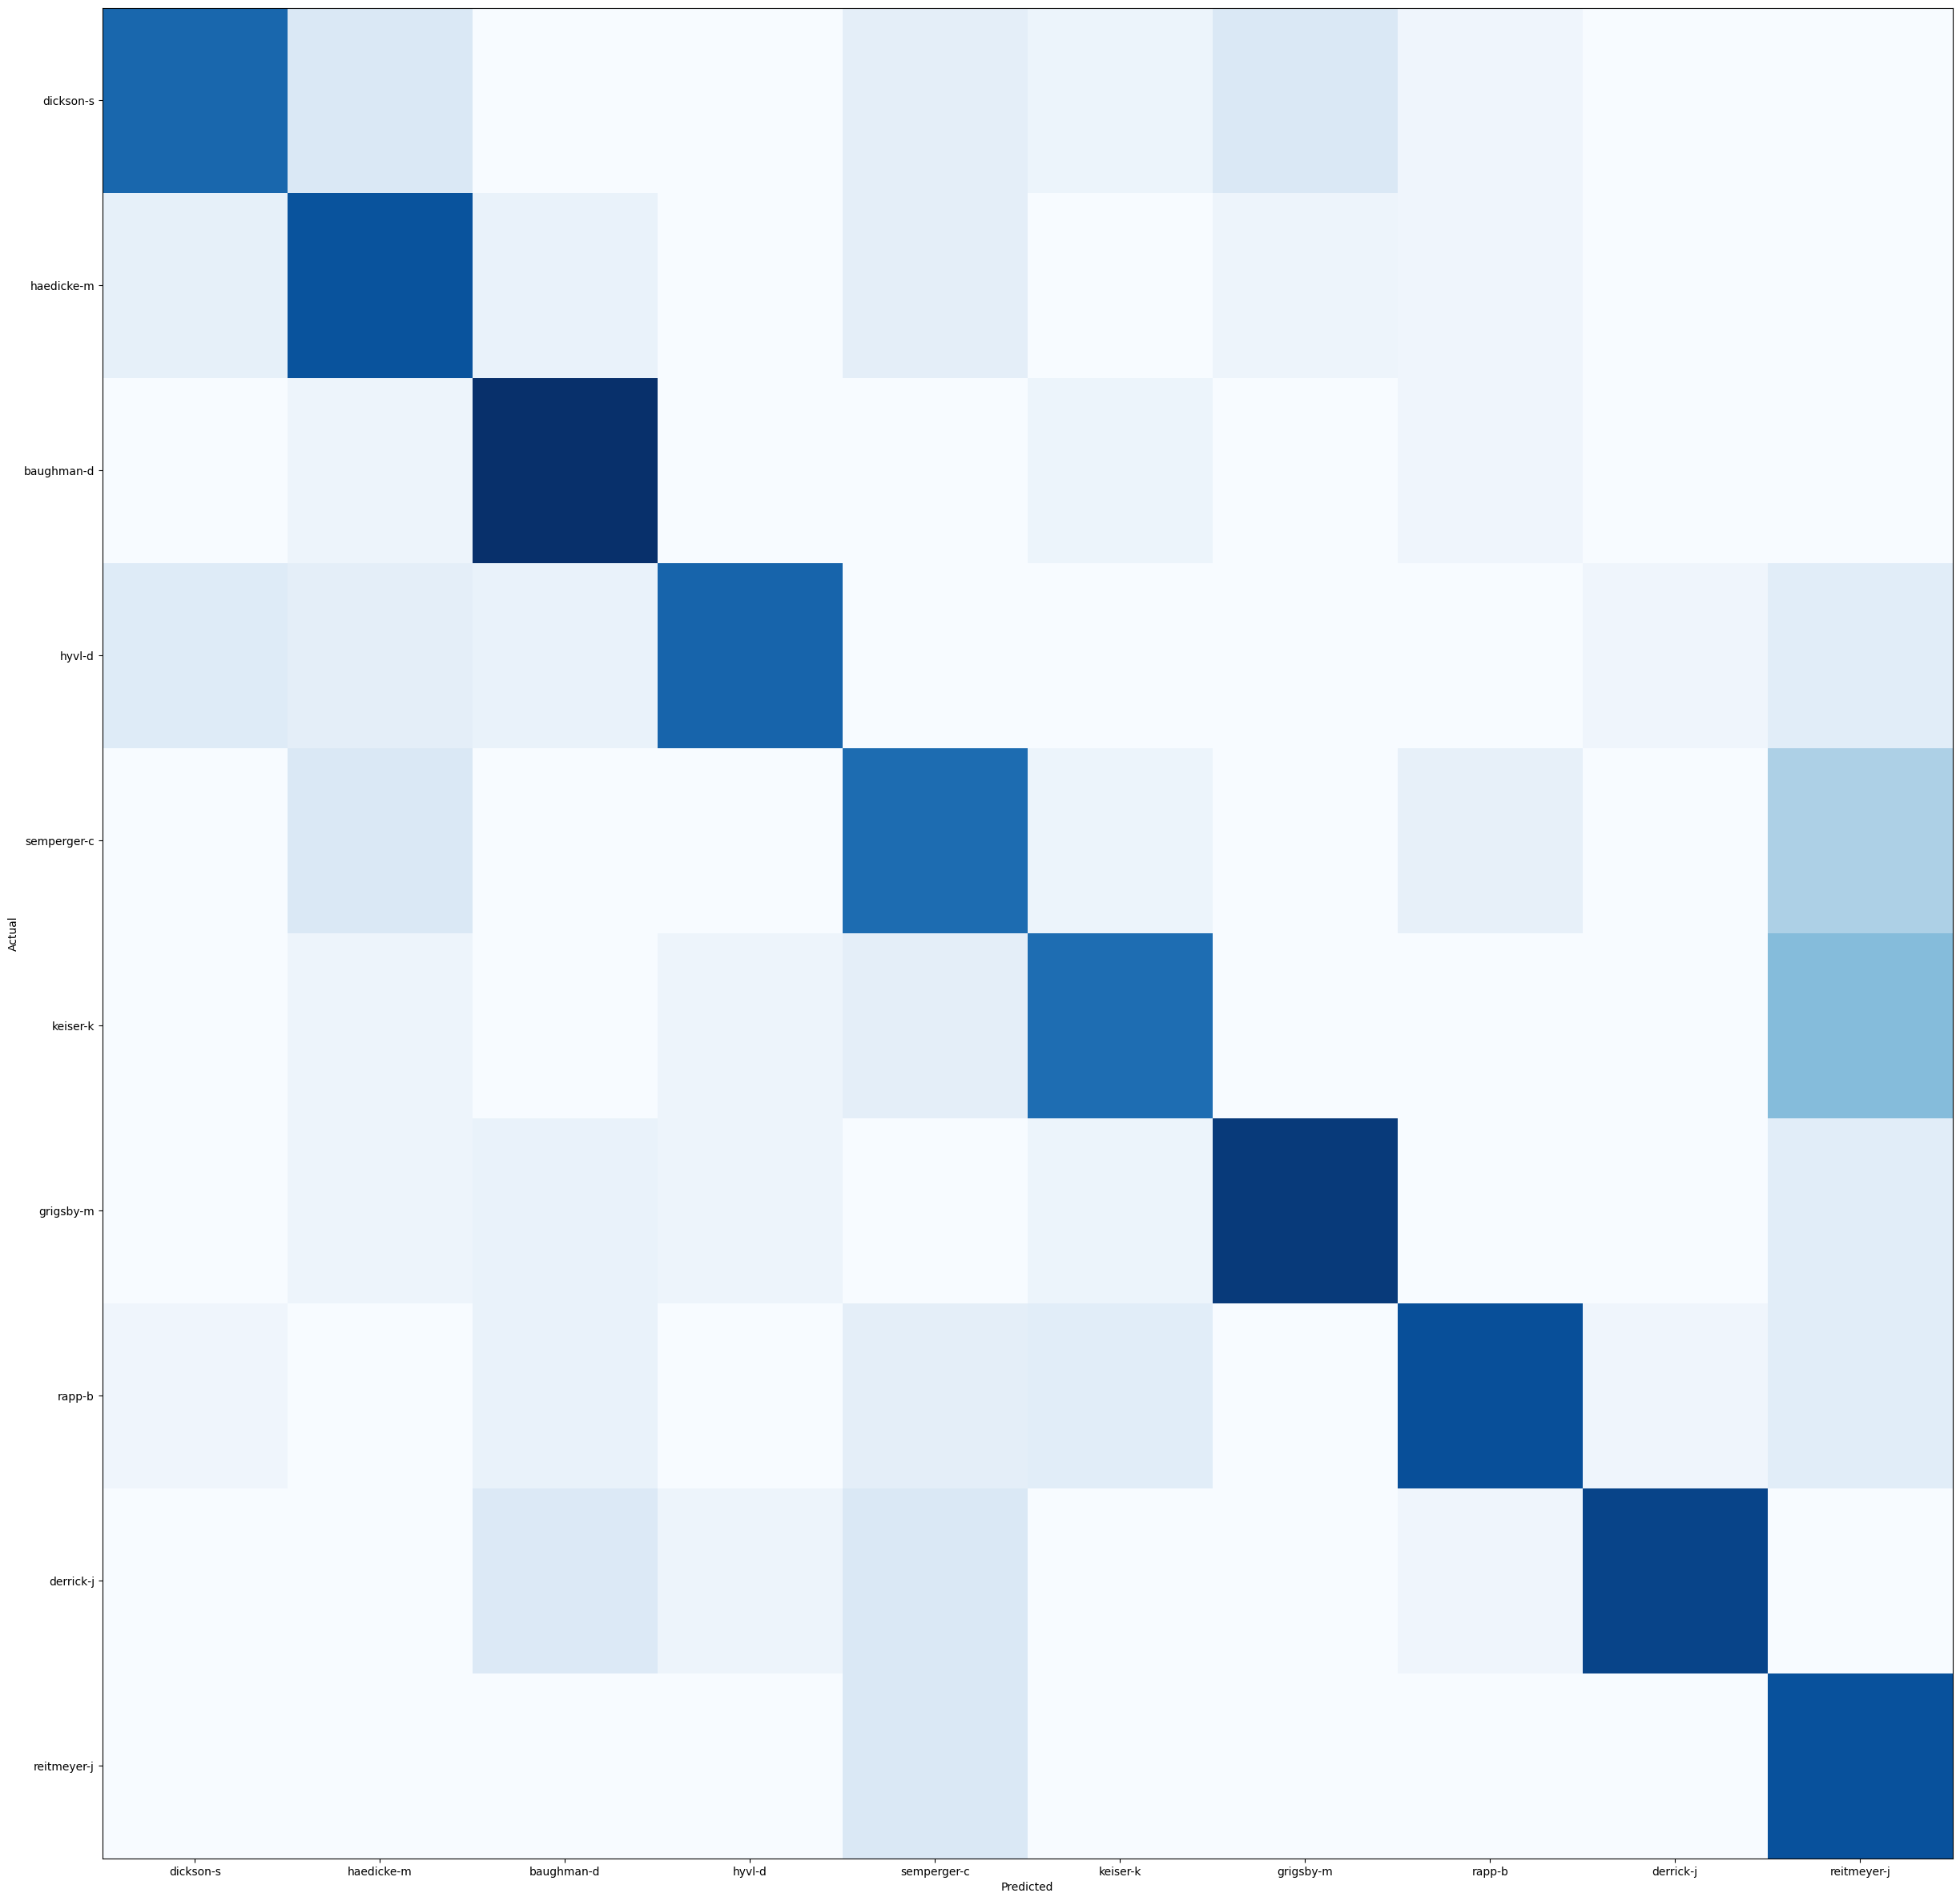

In [81]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.figure(figsize=(30, 30))
plt.imshow(cm, cmap='Blues', interpolation='nearest')
tick_marks = np.arange(len( sorted_authors ))
plt.xticks(tick_marks, sorted_authors )
plt.yticks(tick_marks, sorted_authors )
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()